In [51]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tkinter as tk
from tkinter import simpledialog
import matplotlib as mpl
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [52]:
import json
from pandas.io.json import json_normalize
import seaborn as sns
from matplotlib.patches import Arc, Rectangle, ConnectionPatch
from matplotlib.offsetbox import  OffsetImage
from matplotlib.patches import Arc
from sklearn import metrics

from functools import reduce

In [53]:
pd.set_option('display.max_rows', 400)

In [54]:
folder_path = '~/Documents/GAA Analytics/2023/'
folder_path1 = '~/Documents/GAA Analytics/2024/'

In [55]:
df = pd.read_excel(folder_path1 + "Football_Championship_Combined_xPoint.xlsx")


In [56]:
ff = df[df['Action'].str.contains('fortyfive')]

In [70]:
ff_count = ff.groupby(['PlayerName', 'TeamName']).count()
ff_count = ff_count[['Date']]
ff_count = ff_count.reset_index()
ff_count = ff_count.rename(columns={"Date": "Attempts"})
ff_count

,PlayerName,TeamName,Attempts
0,Billy Hogan,Meath,1
1,Brian Hurley,Cork,1
2,Colm Reape,Mayo,6
3,Connor Gleeson,Galway,1
4,Conor Carroll,Roscommon,2
5,Conor Glass,Derry,3
6,Cormac Costello,Dublin,9
7,Dean Rock,Dublin,1
8,Eddie Nolan,Roscommon,1
9,Liam Brady,Cavan,3


In [74]:
ff_mean = ff.groupby(['PlayerName', 'TeamName']).mean()
ff_mean = ff_mean[['Score', 'xP_adv']]
ff_mean = ff_mean.reset_index()
ff_mean = ff_mean.rename(columns={"Score": "%Conversion", "xP_adv": "Avg_xP"})
ff_mean['%Conversion'] = ff_mean['%Conversion'] * 100
ff_mean

,PlayerName,TeamName,%Conversion,Avg_xP
0,Billy Hogan,Meath,100.000000,0.501158
1,Brian Hurley,Cork,0.000000,0.606954
2,Colm Reape,Mayo,50.000000,0.486324
3,Connor Gleeson,Galway,0.000000,0.434465
4,Conor Carroll,Roscommon,50.000000,0.403821
5,Conor Glass,Derry,33.333333,0.543842
6,Cormac Costello,Dublin,55.555556,0.611966
7,Dean Rock,Dublin,0.000000,0.626367
8,Eddie Nolan,Roscommon,0.000000,0.625781
9,Liam Brady,Cavan,33.333333,0.475372


In [75]:
ff_sum = ff.groupby(['PlayerName', 'TeamName']).sum()
ff_sum = ff_sum[['Score', 'xP_adv']]
ff_sum = ff_sum.reset_index()
ff_sum = ff_sum.rename(columns={"Score": "Points", "xP_adv": "xP"})
ff_sum

,PlayerName,TeamName,Points,xP
0,Billy Hogan,Meath,1,0.501158
1,Brian Hurley,Cork,0,0.606954
2,Colm Reape,Mayo,3,2.917944
3,Connor Gleeson,Galway,0,0.434465
4,Conor Carroll,Roscommon,1,0.807641
5,Conor Glass,Derry,1,1.631527
6,Cormac Costello,Dublin,5,5.507696
7,Dean Rock,Dublin,0,0.626367
8,Eddie Nolan,Roscommon,0,0.625781
9,Liam Brady,Cavan,1,1.426117


In [76]:
result = pd.merge(ff_count, ff_mean, how="left", on=["PlayerName", ])
result = pd.merge(result, ff_sum, how='left', on=['PlayerName'])
result = result[['PlayerName', 'TeamName', 'Attempts', 'Points', '%Conversion', 'xP']]
result['xP'] = result['xP'].round(2)
result['%Conversion'] = result['%Conversion'].round(2)
result['%Conversion'] = result['%Conversion'].apply(lambda x: f'{x:.0f}%')
result = result.sort_values(by=['Attempts', 'Points'], ascending=False)
result

,PlayerName,TeamName,Attempts,Points,%Conversion,xP
6,Cormac Costello,Dublin,9,5,56%,5.51
20,Sean O'Shea,Kerry,9,5,56%,5.31
17,Rory Beggan,Monaghan,6,4,67%,2.67
2,Colm Reape,Mayo,6,3,50%,2.92
15,Rian O'Neill,Armagh,5,2,40%,3.18
12,Neil Flynn,Kildare,4,2,50%,2.27
19,Sam Mulroy,Louth,4,1,25%,2.31
23,Steven Sherlock,Cork,3,3,100%,1.89
5,Conor Glass,Derry,3,1,33%,1.63
9,Liam Brady,Cavan,3,1,33%,1.43


# Sum of Conversion

In [64]:
result.sum()

PlayerName     Cormac CostelloSean O'SheaRory BegganColm Reap...
Attempts                                                      68
Points                                                        33
%Conversion    56%56%67%50%40%50%25%100%33%33%50%0%100%100%10...
xP                                                         37.64
dtype: object

In [65]:
33/68

0.4852941176470588

In [66]:
37.64/68

0.5535294117647059

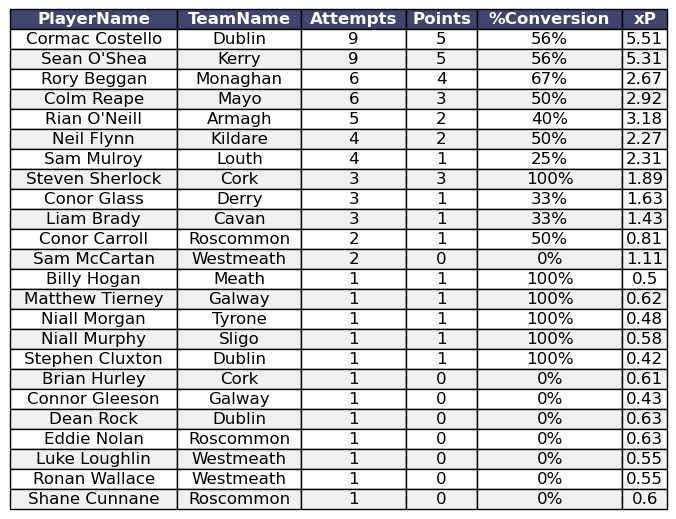

In [78]:
# Create a figure
fig, ax = plt.subplots(figsize=(8, 4))  # Adjust the size as needed

# Remove the x and y axis
ax.axis('off')

# Create the table
table_data = result.values
table_columns = result.columns
table = ax.table(cellText=table_data, colLabels=table_columns, cellLoc='center', loc='center')

# Adjust the table style
table.auto_set_font_size(False)
table.set_fontsize(12)
table.auto_set_column_width(col=list(range(len(result.columns))))

# Style the table headers
for i in range(len(table_columns)):
    cell = table[(0, i)]
    cell.set_fontsize(14)
    cell.set_text_props(weight='bold', color='white')
    cell.set_facecolor('#40466e')

# Style the table rows
for i in range(1, len(result) + 1):
    for j in range(len(table_columns)):
        cell = table[(i, j)]
        if i % 2 == 0:
            cell.set_facecolor('#f1f1f2')
        else:
            cell.set_facecolor('white')

# Adjust cell borders
table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1.2, 1.2)

plt.savefig('FortyFive_Summary.png', dpi=300, bbox_inches='tight')

# Show the table
plt.show()